In [1]:
import sys
sys.path.append('../')
import pandas as pd
from loglizer.models import *
from loglizer import dataloader, preprocessing
import matplotlib.pyplot as plt

struct_log = './loghub/HDFS/HDFS_100m.log_structured.csv' # The benchmark dataset
label_file = './loghub/HDFS/anomaly_label.csv' # The anomaly label file
feature_extractor = preprocessing.FeatureExtractor()
(x_tr, y_train), (x_te, y_test) = dataloader.load_HDFS(struct_log, label_file=label_file, window='session', train_ratio=0.5, split_type='uniform')
benchmark_results = []
train_results = []
test_results = []

def model_evaluate(_model, model, x_te, y_test, x_train, y_train):
    x_test = feature_extractor.transform(x_te)
    precision, recall, f1 = model.evaluate(x_train, y_train)
    benchmark_results.append([_model + '-train', precision, recall, f1])
    train_results.append([_model, precision, recall, f1])
    precision, recall, f1 = model.evaluate(x_test, y_test)
    benchmark_results.append([_model + '-test', precision, recall, f1])
    test_results.append([_model, precision, recall, f1])

====== Input data summary ======
Loading ./loghub/HDFS/HDFS_100m.log_structured.csv
1209 1210
Total: 103804 instances, 2419 anomaly, 101385 normal
Train: 51901 instances, 1209 anomaly, 50692 normal
Test: 51903 instances, 1210 anomaly, 50693 normal



/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


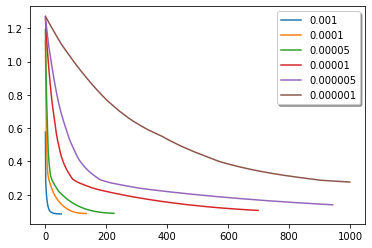

In [2]:
train_results = []
test_results = []
fig, ax = plt.subplots()
x_train = feature_extractor.fit_transform(x_tr, term_weighting='tf-idf')

model = MLP(solver='adam', max_iter=1000, learning_rate_init=0.001)
model.fit(x_train, y_train)
model_evaluate('MLP', model, x_te, y_test, x_train, y_train)
ax.plot(model.classifier.loss_curve_, '', label='0.001')

model = MLP(solver='adam', max_iter=1000, learning_rate_init=0.0001)
model.fit(x_train, y_train)
model_evaluate('MLP', model, x_te, y_test, x_train, y_train)
ax.plot(model.classifier.loss_curve_, '', label='0.0001')

model = MLP(solver='adam', max_iter=1000, learning_rate_init=0.00005)
model.fit(x_train, y_train)
model_evaluate('MLP', model, x_te, y_test, x_train, y_train)
ax.plot(model.classifier.loss_curve_, '', label='0.00005')

model = MLP(solver='adam', max_iter=1000, learning_rate_init=0.00001)
model.fit(x_train, y_train)
model_evaluate('MLP', model, x_te, y_test, x_train, y_train)
ax.plot(model.classifier.loss_curve_, '', label='0.00001')

model = MLP(solver='adam', max_iter=1000, learning_rate_init=0.000005)
model.fit(x_train, y_train)
model_evaluate('MLP', model, x_te, y_test, x_train, y_train)
ax.plot(model.classifier.loss_curve_, '', label='0.000005')

model = MLP(solver='adam', max_iter=1000, learning_rate_init=0.000001)
model.fit(x_train, y_train)
model_evaluate('MLP', model, x_te, y_test, x_train, y_train)
ax.plot(model.classifier.loss_curve_, '', label='0.000001')

legend = ax.legend(shadow=True)

In [3]:
print('====== Train Results ======')
print(pd.DataFrame(train_results, columns=['Model', 'Precision', 'Recall', 'F1']))
print('\n====== Test Results ======')
print(pd.DataFrame(test_results, columns=['Model', 'Precision', 'Recall', 'F1']))
#pd.DataFrame(benchmark_results, columns=['Model', 'Precision', 'Recall', 'F1']).to_csv('benchmark_result.csv', index=False)

====== Train Results ======
  Model  Precision    Recall        F1
0   MLP   1.000000  0.259719  0.412344
1   MLP   1.000000  0.259719  0.412344
2   MLP   1.000000  0.259719  0.412344
3   MLP   0.993671  0.259719  0.411803
4   MLP   1.000000  0.167080  0.286322
5   MLP   0.983193  0.096774  0.176205

====== Test Results ======
  Model  Precision    Recall        F1
0   MLP   0.052419  0.032231  0.039918
1   MLP   0.052419  0.032231  0.039918
2   MLP   0.048848  0.043802  0.046187
3   MLP   0.033221  0.057025  0.041984
4   MLP   1.000000  0.006612  0.013136
5   MLP   0.800000  0.006612  0.013115


In [4]:
train_results = []
test_results = []
x_train = feature_extractor.fit_transform(x_tr, term_weighting='tf-idf')

model = MLP(solver='adam', max_iter=1000, learning_rate_init=0.00005, alpha=1e-1)
model.fit(x_train, y_train)
model_evaluate('MLP', model, x_te, y_test, x_train, y_train)

model = MLP(solver='adam', max_iter=1000, learning_rate_init=0.00005, alpha=1e-3)
model.fit(x_train, y_train)
model_evaluate('MLP', model, x_te, y_test, x_train, y_train)

model = MLP(solver='adam', max_iter=1000, learning_rate_init=0.00005, alpha=1e-5)
model.fit(x_train, y_train)
model_evaluate('MLP', model, x_te, y_test, x_train, y_train)

model = MLP(solver='adam', max_iter=1000, learning_rate_init=0.00005, alpha=1e-7)
model.fit(x_train, y_train)
model_evaluate('MLP', model, x_te, y_test, x_train, y_train)

model = MLP(solver='adam', max_iter=1000, learning_rate_init=0.00005, alpha=1e-9)
model.fit(x_train, y_train)
model_evaluate('MLP', model, x_te, y_test, x_train, y_train)

In [5]:
print('====== Train Results ======')
print(pd.DataFrame(train_results, columns=['Model', 'Precision', 'Recall', 'F1']))
print('\n====== Test Results ======')
print(pd.DataFrame(test_results, columns=['Model', 'Precision', 'Recall', 'F1']))
#pd.DataFrame(benchmark_results, columns=['Model', 'Precision', 'Recall', 'F1']).to_csv('benchmark_result.csv', index=False)

====== Train Results ======
  Model  Precision    Recall        F1
0   MLP        1.0  0.259719  0.412344
1   MLP        1.0  0.259719  0.412344
2   MLP        1.0  0.259719  0.412344
3   MLP        1.0  0.259719  0.412344
4   MLP        1.0  0.259719  0.412344

====== Test Results ======
  Model  Precision    Recall        F1
0   MLP   0.052419  0.032231  0.039918
1   MLP   0.052419  0.032231  0.039918
2   MLP   0.048848  0.043802  0.046187
3   MLP   0.048848  0.043802  0.046187
4   MLP   0.048848  0.043802  0.046187
